# Hackathon Part3: Modeling

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline


from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor, BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostRegressor
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import metrics
from sklearn.base import BaseEstimator
from sklearn.svm import SVC, SVR 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [29]:
# read data
%store -r data
%store -r test

In [10]:
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,wage,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Male,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college
0,4.025352,12.754289,5,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,3.332205,11.474455,9,0,0,45,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3.496508,12.433686,13,7688,0,50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,3.258097,12.090325,13,0,0,45,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3.688879,10.947204,14,14084,0,55,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [11]:
data.corr()[['wage']].sort_values('wage', ascending=False)

,wage
wage,1.000000
marital-status_ Married-civ-spouse,0.449058
education-num,0.323444
age,0.275111
hours-per-week,0.255036
sex_ Male,0.229343
occupation_ Exec-managerial,0.227241
capital-gain,0.221318
occupation_ Prof-specialty,0.181716
education_ Bachelors,0.170886


In [30]:
X = data.drop(['wage', 'hours-per-week','education-num'], axis=1)
test = test.drop(['hours-per-week','education-num'], axis=1)
y = data['wage']
ss = StandardScaler()
ss.fit_transform(X)
ss.transform(test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


array([[-1.01847589,  0.52974894, -0.14337902, ..., -0.04474546,
        -0.12683142, -0.53552589],
       [ 0.13862009, -0.94595582, -0.14337902, ..., -0.04474546,
        -0.12683142, -0.53552589],
       [-0.70529478,  1.16037578, -0.14337902, ..., -0.04474546,
        -0.12683142, -0.53552589],
       ...,
       [ 0.13862009,  1.3307421 , -0.14337902, ..., -0.04474546,
        -0.12683142, -0.53552589],
       [ 0.54375528, -1.05463804,  0.59424498, ..., -0.04474546,
        -0.12683142, -0.53552589],
       [-0.08864292,  0.18045919, -0.14337902, ..., -0.04474546,
        -0.12683142, -0.53552589]])

In [129]:
from sklearn.base import BaseEstimator
class ClfSwitcher(BaseEstimator):

    def __init__(
        self, 
        estimator = SGDClassifier(),
    ):
        """
        A Custom BaseEstimator that can switch between classifiers.
        :param estimator: sklearn object - The classifier
        """ 

        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_proba(self, X):
        return self.estimator.predict_proba(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

In [40]:
pipe_params = [
    {
        'model__estimator': [LogisticRegression()],
        'model__estimator__penalty': ['l1', 'l2']
    },
    {
        'model__estimator': [RandomForestClassifier()],
        'model__estimator__min_samples_split': [2, 3, 4, 5],
        'model__estimator__min_samples_leaf' : [13, 14, 15, 16, 17],
    },
     {
        'model__estimator': [DecisionTreeClassifier()],
        'model__estimator__min_samples_split': [2, 3, 4],
        'model__estimator__min_samples_leaf' : [1, 2, 3, 4],
        'model__estimator__max_features' : ['auto' , 'sqrt'],
    },
    {
        'model__estimator': [AdaBoostClassifier()],
        'model__estimator__n_estimators': [80, 90, 100],
        'model__estimator__learning_rate' : [1, 2],
        'model__estimator__algorithm' : ['SAMME', 'SAMME.R'],
        'model__estimator__random_state' : [86]
    },
     {
        'model__estimator': [KNeighborsClassifier()],
        'model__estimator__p': [1, 2],
        'model__estimator__leaf_size' : [30, 20, 10],
    },
     {
        'model__estimator': [BaggingClassifier()],
        'model__estimator__n_estimators': [50, 100, 200, 300],
        'model__estimator__bootstrap' : [True, False]
     },
     {
        'model__estimator': [SVC()],
        'model__estimator__degree' : [2, 3, 4],
        'model__estimator__C' : [100, 150, 200],

     },
         {
        'model__estimator': [GaussianNB()]
     },

]

# Defining a function to do our model analysis. This function takes in X, y, and any pipe parameters
def model_analysis(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=86)
    pipe = Pipeline([
            ('model', ClfSwitcher())])

    gs = GridSearchCV(pipe, pipe_params, cv=3, verbose=3, n_jobs=3)
    gs.fit(X_train, y_train)

    print(f' Best Parameters: {gs.best_params_}')
    print('')
    print(f' Cross Validation Accuracy Score: {gs.best_score_}')
    print(f' Training Data Accuracy Score: {gs.score(X_train, y_train)}')
    print(f' Testing Data Accuracy Score: {gs.score(X_test, y_test)}')

In [41]:
model_analysis(X, y)

Fitting 3 folds for each of 82 candidates, totalling 246 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  86 tasks      | elapsed:    1.5s
[Parallel(n_jobs=3)]: Done 246 out of 246 | elapsed:  1.2min finished
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


 Best Parameters: {'model__estimator': SVC(C=150, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False), 'model__estimator__C': 150, 'model__estimator__degree': 2}

 Cross Validation Accuracy Score: 0.8544783767165403
 Training Data Accuracy Score: 0.868620618979299
 Testing Data Accuracy Score: 0.8623232944068838


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=86)
SVC = SVC(C=150, degree=2, random_state=86, probability=True)
SVC.fit(X_train, y_train)
SVC_preds = SVC.predict(X_train)


# Running cross value scores
cvs = cross_val_score(SVC, X_train, y_train, cv=5).mean()
print(SVC.score(X_test, y_test))

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default 

0.8672403196066379


In [33]:
SVC.predict_proba(X_test)[:10]

array([[0.87444775, 0.12555225],
       [0.68103322, 0.31896678],
       [0.83679048, 0.16320952],
       [0.87477893, 0.12522107],
       [0.93731218, 0.06268782],
       [0.77343254, 0.22656746],
       [0.84163891, 0.15836109],
       [0.98912106, 0.01087894],
       [0.97423395, 0.02576605],
       [0.13658476, 0.86341524]])

In [14]:
pred_proba = [i[1] for i in SVC.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [15]:
results = pd.DataFrame(SVC.predict(X_test), columns=['predicted'])

# Create column for observed values.
y_test = y_test.reset_index()
results['actual'] = y_test['wage']
results['index1'] = y_test['index']
results.set_index('index1', inplace=True)

In [16]:
results

,predicted,actual
index1,,
2354,0,0
6212,0,1
6267,0,1
5854,0,0
1238,0,0
1926,0,0
5689,0,1
664,0,0
282,0,0


In [17]:
row_ids = results[results['predicted'] != results['actual']].index


In [18]:
row_ids.shape

(216,)

In [19]:
pred_df

,true_values,pred_probs
2354,0,0.125552
6212,1,0.318967
6267,1,0.163210
5854,0,0.125221
1238,0,0.062688
1926,0,0.226567
5689,1,0.158361
664,0,0.010879
282,0,0.025766
1376,1,0.863415


In [53]:
probs = SVC.predict_proba(test)

In [54]:
probs

array([[0.98043763, 0.01956237],
       [0.87722869, 0.12277131],
       [0.4777369 , 0.5222631 ],
       ...,
       [0.17940451, 0.82059549],
       [0.83691617, 0.16308383],
       [0.18238287, 0.81761713]])

In [55]:
df_probs = pd.DataFrame(probs)

In [56]:
results = df_probs[1]

In [69]:
results.to_csv('./data/results.csv', header='wage', index=False)

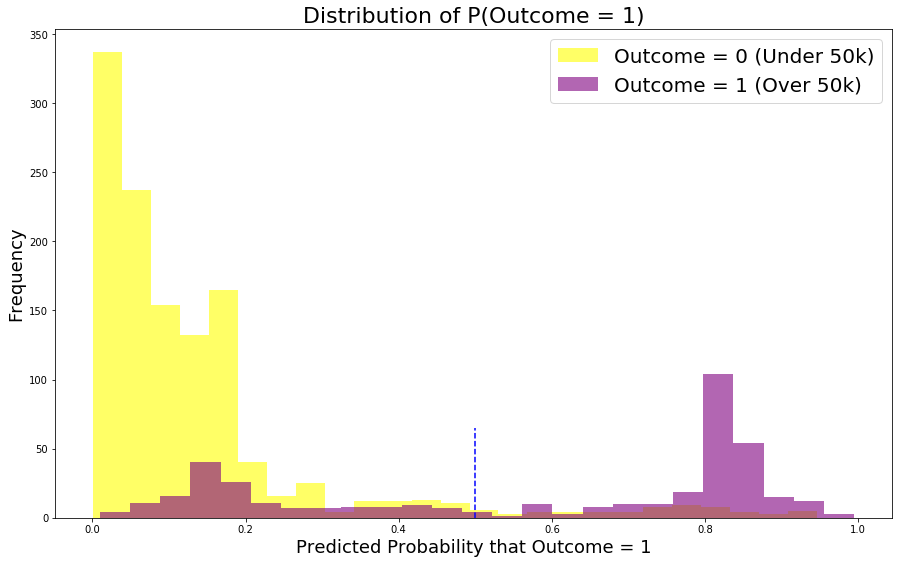

In [65]:
# Create figure to display the predicted probabilities for posts that were classified at California vs Not California.
#
plt.figure(figsize = (15,9))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='yellow',
         alpha = 0.6,
         label='Outcome = 0 (Under 50k)')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='purple',
         alpha = 0.6,
         label='Outcome = 1 (Over 50k)')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)
plt.vlines(x=0.5,
           ymin = 0,
           ymax = 65,
           color='blue',
           linestyle = '--')

# Create legend.
plt.legend(fontsize=20);

In [68]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.9004209127159946